# US Accident Exploratory Data Analysis

## Data Download

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets

source_url= "https://www.kaggle.com/sobhanmoosavi/us-accidents"

opendatasets.download(source_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shitabtanzim
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:01<00:00, 85.6MB/s]


In [4]:
filename= "./us-accidents/US_Accidents_Dec20_updated.csv" 

## Data Preparation and Cleaning

In [5]:
import pandas as pd

In [6]:
df= pd.read_csv(filename)

In [60]:
len(df)

1516064

% of missing values per column

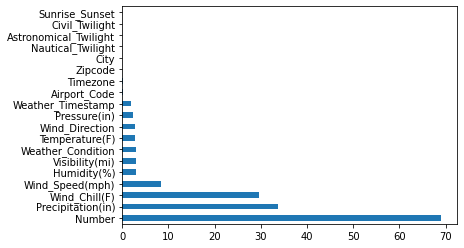

In [7]:
missing_percentages= df.isna().sum().sort_values(ascending=False) / len(df) *100
missing_percentages[missing_percentages!=0].plot(kind='barh')

Remove columns that you don't want to use

In [8]:
df= df.drop('Number', axis=1)

## Exploratory Analysis and Data Visualisation

Column we'll analyze
- City
- Start Time
- Start Lat, Start Long
- Temperature
- Weather condition

### City

In [9]:
len(df.City.unique())

10658

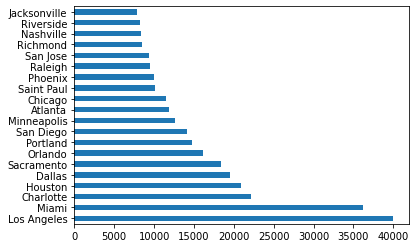

In [10]:
cities_by_accident= df.City.value_counts()
cities_by_accident[:20].plot(kind="barh")

In [11]:
'New York' in df.City

False

In [12]:
'NY' in df.State

False

In [13]:
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


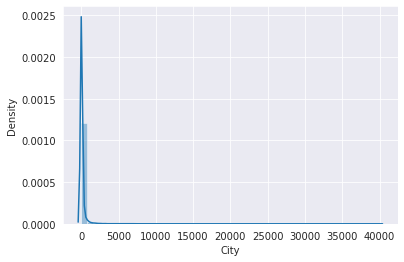

In [14]:
sns.distplot(cities_by_accident)

In [15]:
high_accident_cities= cities_by_accident[cities_by_accident > 1000]
low_accident_cities= cities_by_accident[cities_by_accident <= 1000]
print(len(high_accident_cities))
print(len(low_accident_cities))

251
10406


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


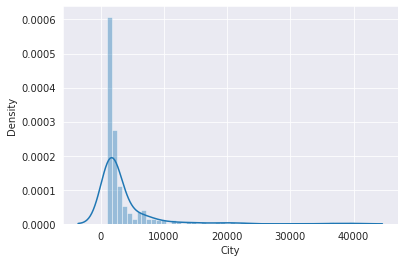

In [16]:
sns.distplot(high_accident_cities)

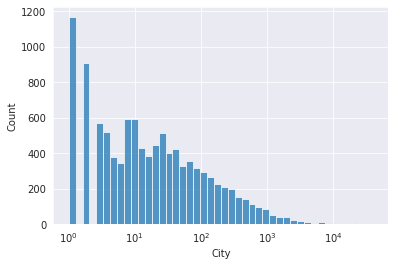

In [17]:
sns.histplot(cities_by_accident, log_scale=True)

In [18]:
cities_by_accident[cities_by_accident == 1]

Southwest Ranches    1
Horse Shoe           1
Decker               1
Urbanna              1
West Charleston      1
                    ..
Shelburn             1
Centerview           1
West Newbury         1
Brierfield           1
Trimble              1
Name: City, Length: 1167, dtype: int64

### Start_Time

In [22]:
df.Start_Time= pd.to_datetime(df.Start_Time)

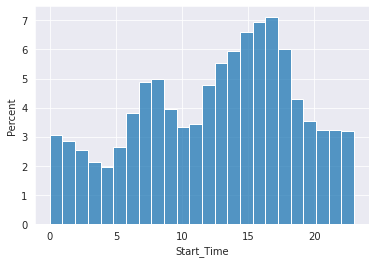

In [34]:
sns.histplot(df.Start_Time.dt.hour, stat='percent', bins=24)

- A high percentage of accident occur between 3pm to 6pm ( probably people tired after work, or faded sunlight (dusk), or both)
- Next highest point is 7-9

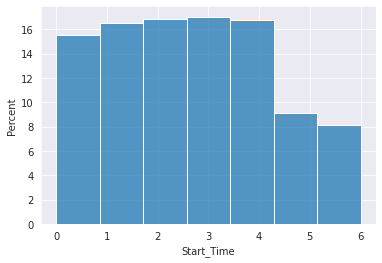

In [36]:
sns.histplot(df.Start_Time.dt.dayofweek, stat='percent', bins=7)

- On weekend number of accident is less
- QQQ- Is the distribution of accident by hour is the same on weekend

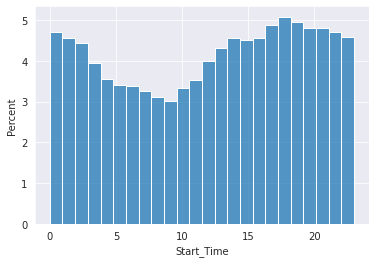

In [48]:
sunday_start_time= df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.histplot(sunday_start_time.dt.hour, stat='percent', bins=24)

On Sundays the peak occur between 5pm and 8pm

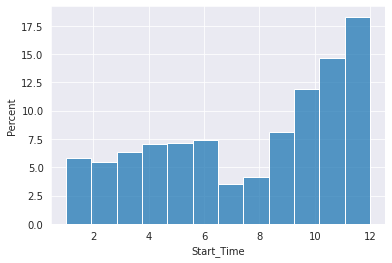

In [76]:
sns.histplot(df.Start_Time.dt.month, stat='percent', bins=12)

-- Find out why the skewness is occuring

-- Much data is missing in some year

### Lat and Long

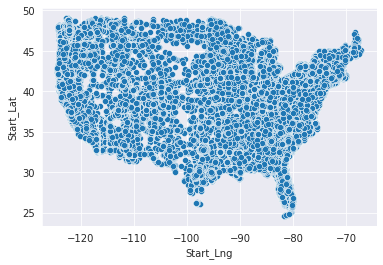

In [77]:
sns.scatterplot(x=df.Start_Lng, y= df.Start_Lat )

In [78]:
import folium

In [81]:
lat, lng = df.Start_Lat[0], df.Start_Lng[0]

In [ ]:
df_sample= df.sample(100)


In [ ]:
map= folium.Map()
for lat,lng in zip(df_sample.Start_Lat, df_sample.Start_Lng):
  marker= folium.Marker((lat,lng))
  marker.add_to(map)
map

## Ask and Answer Questions

1. Are the more accidents in warmer or colder areas?
2. Which states has the highest number of accidents? Check per capita
3. Why doesn't NY shows in the data? if yes why is doesn't have many accidents
5. What time of the day accident are frequent?
6. Which days or the weeek have most accidents?
7. Which month have most accident?
8. What is the year by year trend?
9. When is accident per unit traffic is highest

## Summary and Conclusion

Insights:
1. Not data for NY
2. Less than 5% cities have more than 1000 yearly accidents
3. No. of accident per city decreases/increases exponentially
4. Over 12,000 cities reported 1 accident. !Need to investigate